<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Metodo_de_Aceptacion_y_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
def f(x):
    if -1 <= x <= 1:
        return (3*x**2)/2
    else:
        return 0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def aceptacion_rechazo(f, a, b, M, n_muestras):
    """
    Método de aceptación y rechazo para generar muestras aleatorias.

    Parámetros:
    - f: función de densidad objetivo (debe estar definida para x en [a, b])
    - a, b: límites del intervalo de definición
    - M: cota superior de f(x) en [a, b]
    - n_muestras: número de muestras que se desean generar

    Retorna:
    - Lista de valores aceptados como muestras de la distribución f(x)
    """
    muestras = []
    while len(muestras) < n_muestras:
        R1 = np.random.uniform(0, 1)
        R2 = np.random.uniform(0, 1)
        x = a + (b - a) * R1
        fx = f(x)
        if R2 <= fx / M:
            muestras.append(x)
    return np.array(muestras)


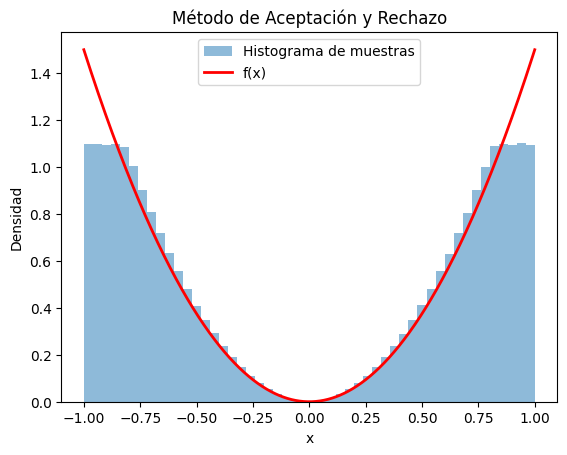

In [6]:
# Definir parámetros
a = -1
b = 1
M = 1
n = 10000000

# Generar muestras
muestras = aceptacion_rechazo(f, a, b, M, n)

# Graficar histograma y f(x)
x_vals = np.linspace(a, b, 1000)
f_vals = [f(x) for x in x_vals]

plt.hist(muestras, bins=50, density=True, alpha=0.5, label='Histograma de muestras')
plt.plot(x_vals, f_vals, 'r', lw=2, label='f(x)')
plt.legend()
plt.title('Método de Aceptación y Rechazo')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.show()